# question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
import sklearn
import sklearn.neighbors
import sklearn.datasets
from sklearn import decomposition, manifold

In [2]:
data, label = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

In [3]:
data = pd.DataFrame(data)

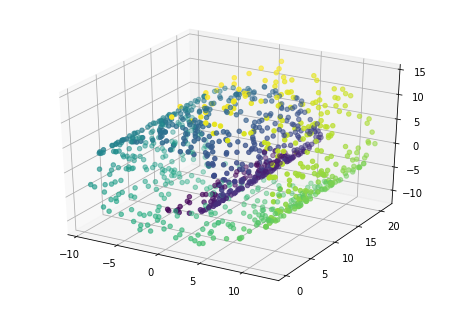

In [4]:
ax = Axes3D(plt.figure())
ax.scatter(data[0],data[1],data[2],c=label)
plt.show()

In [5]:
#question 2.1.1 pca to the data set to 2 parameters
pr_dict ={}
pr_dict['extension']= data
pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))




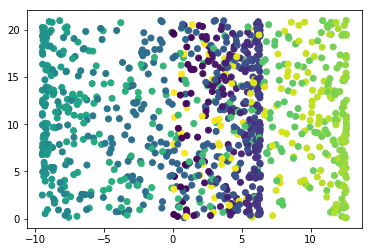

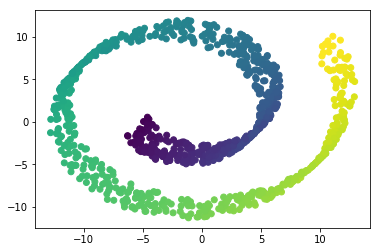

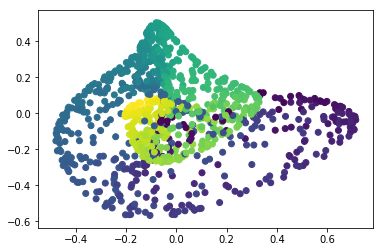

In [6]:
for key in pr_dict.keys():
    plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
    plt.show()


we after iterating diferent gamma values $\gamma = \frac{1}{2*\sigma^2}$ we find that $\gamma = 0.03$ represents the data the best

## question 2.1.1
- 3

In [7]:


# The idea is to unfold the data knowing how the data is build 
# 
data2= data.copy()
data2['arctan']= np.arctan(data[0]/data[2])*100
data2['big_zed']= data[1]*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


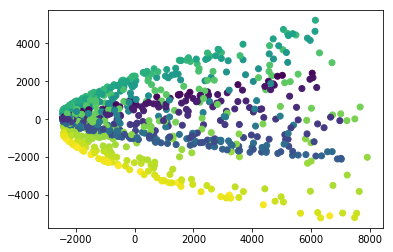

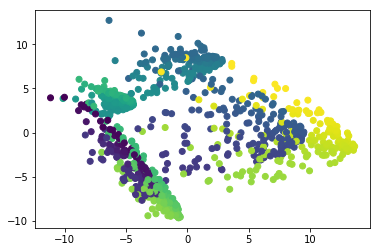

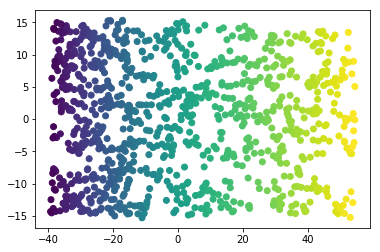

In [8]:
#since we have told we can use any sklearn algohrimt we cheat and use isomap to unfold the data and then maximise the fetures 
# features to a biger dimention to make look the original fetures really small, we could also use some 
# transformation from x in R^n to phi(x) in R^m s.t m>>n 


# polinom try 
poli = data.copy()
# We use a polinom of order 3 which will yield us 20 new features we did include the original ones .... 
pol2 = sklearn.preprocessing.PolynomialFeatures(degree=3).fit_transform(poli)

# We also use a log transformacion over the polinomial (trail and error ) it didn't yield better results 
transformer = sklearn.preprocessing.FunctionTransformer(np.log1p).fit_transform(pol2)

#PCA descomposition of the data after add the fetures 
c= decomposition.PCA(n_components=2 ).fit_transform(pol2).T
d= decomposition.PCA(n_components=2 ).fit_transform((pd.DataFrame(transformer).fillna(0).values)).T
plt.scatter(c[0],c[1],c=label)
plt.show()
plt.scatter(d[0],d[1],c=label)
plt.show()

#we also cheat with the ideas and did a Isomo unfold of the data set and then run a pca
# by doing this we found the best results
a= data.copy()
cheat_iso = manifold.Isomap(n_components=3,n_neighbors=7).fit_transform(data)
a[3]=cheat_iso.T[0]
a[4]=cheat_iso.T[1]
a[5]=cheat_iso.T[2]
b= decomposition.PCA(n_components=2 ).fit_transform(a).T
plt.scatter(b[0],b[1],c=label)
plt.show()

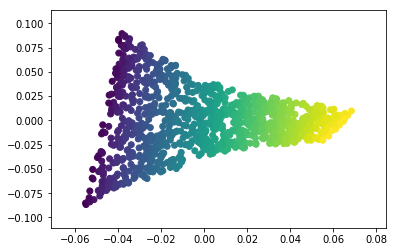

In [9]:
#Question 2.1.2
# LLE and Isomap

lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=12).fit_transform(data).T
plt.scatter(lle[0],lle[1],c=label)
plt.show()

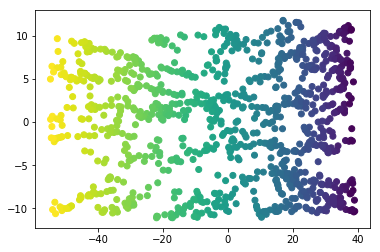

In [10]:
iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
plt.scatter(iso[0],iso[1],c=label)
plt.show()

### Question 2.1.3 - 1
- We will write a funtion that choose to randon points  

In [11]:
# section 1 - choose two nearest neighbors- 
def find_distances(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 2).fit(data_reduce)
    distances, labels = nbrs.kneighbors(data_reduce)
    index = pd.DataFrame(labels).sample(n=1)
    two_points_original = data.loc[index.values[0],:]
    two_points_PR = data_reduce.loc[index.values[0],:]
    
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')


find_distances(data, pr_dict['pca'])   
find_distances(data,pr_dict['kpca'])
find_distances(data,pd.DataFrame(iso))
find_distances(data,pd.DataFrame(lle))


The original distance is 16.052736844958172, the distance in the paramer reduction is 15.949645177268424
The original distance is 28.359967360003317, the distance in the paramer reduction is 0.4728647981363036
The original distance is 24.624588855135922, the distance in the paramer reduction is 887.0288368910492
The original distance is 24.624588855135922, the distance in the paramer reduction is 1.4142135623730951


In [12]:
# section 2 - choose two points that are not in each other's 40'th nearest neighbors-
def find_distance_40(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
    distances, labels = nbrs.kneighbors(data)
    pd.DataFrame(labels).head()
    tmp=pd.DataFrame(labels)
    while(True):
        pair = np.reshape(tmp.sample(n=1).values,-1)
        pair = [pair[0],pair[-1]]
        if pair[0] not in tmp.loc[pair[1],:]:
            break 
    two_points_original = data.loc[pair,:]
    two_points_PR = data_reduce.loc[pair,:]
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')
    

In [13]:
find_distance_40(data, pr_dict['pca'])   
find_distance_40(data,pr_dict['kpca'])
find_distance_40(data,pd.DataFrame(iso).T)
find_distance_40(data,pd.DataFrame(lle).T)

The original distance is 28.373225214213253, the distance in the paramer reduction is 17.55423125089792
The original distance is 17.901171713256698, the distance in the paramer reduction is 0.604536590064122
The original distance is 13.960177165652958, the distance in the paramer reduction is 17.160737854820148
The original distance is 12.373127172387978, the distance in the paramer reduction is 0.06716972948053776


In [14]:
# section 3 - choose two points that are not in each other's 40'th nearest neighbors-


In [15]:
def find_12(data, data_reduce):
    nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]
    for dataIdx in data.index:
        high=labels_high[dataIdx,:]
        low=labels_low[dataIdx,:]
        k_nn_not_12=np.intersect1d(high,low)
        # assumed that the meaning was to exclude from the 12NN in low-dimension, those who was also included in high-dimension-
        low=np.delete(low,k_nn_not_12)
        c.append(data_reduce.loc[low,:])
        # assuming that the meaning of |c(i)| == number of data points in the group c(i)
    print(f' mean of all c = {np.mean(([len(x) for x in c]))}')
    return c
#displaying mean value of c-
c=dict()
c['pca']=find_12(data, pr_dict['pca']) 
c['kpca']=find_12(data,pr_dict['kpca'])
c['iso']=find_12(data,pd.DataFrame(iso).T)
c['lle']=find_12(data,pd.DataFrame(lle).T)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.934
 mean of all c = 11.934
 mean of all c = 11.866
 mean of all c = 11.895


In [16]:
c['pca'][1]

,0,1
1,-5.913321,-10.015945
813,-5.664813,-10.238128
188,-5.350416,-9.851537
899,-6.546138,-9.995213
809,-6.565937,-9.697459
528,-6.285149,-9.329633
882,-5.185128,-9.690127
523,-6.492686,-9.428759
554,-6.351552,-9.116505
581,-4.891192,-10.054647


In [17]:
# section 3 - calculate the mean MDS measure of distances -
def mean_MDS(data,data_reduce):
    """nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]"""
    c=find_12(data, data_reduce) 
    mds=[] 
    for num, c_i in enumerate(c):
        x_i=data.loc[num,:]
        y_i=data_reduce.loc[num,:]
        sum_i=0
        for dataIdx in c_i.index:
            x=data.loc[dataIdx,:]
            y=data_reduce.loc[dataIdx,:]
            high_dist = np.linalg.norm([x,x_i])
            low_dist = np.linalg.norm([y,y_i])
            inner_argument=np.square(high_dist-low_dist)
            sum_i=sum_i+inner_argument
        mds.append(sum_i/len(c_i))
    print(f' mean of all mds = {np.mean(mds)}')
    return mds

#displaying mean value of mds-
mds=dict()
mds['pca']= mean_MDS(data, pr_dict['pca']) 
mds['kpca']=mean_MDS(data,pr_dict['kpca'])
mds['iso']= mean_MDS(data,pd.DataFrame(iso).T)
mds['lle']= mean_MDS(data,pd.DataFrame(lle).T)

#for point=3 for example-


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.934
 mean of all mds = 108.12181565661903
 mean of all c = 11.934
 mean of all mds = 471.6715707519051
 mean of all c = 11.866
 mean of all mds = 539.8005719425211
 mean of all c = 11.895
 mean of all mds = 483.78183938978725


In [18]:

nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
distances, labels = nbrs.kneighbors(data)
pd.DataFrame(labels).head()
tmp=pd.DataFrame(labels)
while(True):
    pair = np.reshape(tmp.sample(n=1).values,-1)
    pair = [pair[0],pair[-1]]
    if pair[0] not in tmp.loc[pair[1],:]:
        break 


In [19]:

def all_two(data):
    pr_dict ={}
    pr_dict['extension']= data
    pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
    pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))
    for key in pr_dict.keys():
        plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
        plt.show()

    data2= data.copy()
    data2['arctan']= np.arctan(data[0]/data[2])*100
    data2['big_zed']= data[1]*100

    plt.scatter(data2['arctan'],data2['big_zed'],c=label)
    plt.show()

    # polinom try 
    poli = data.copy()
    pol2 = sklearn.preprocessing.PolynomialFeatures(degree=3).fit_transform(poli)
    transformer = sklearn.preprocessing.FunctionTransformer(np.log1p).fit_transform(pol2)
    c= decomposition.PCA(n_components=2 ).fit_transform(pol2).T
    d= decomposition.PCA(n_components=2 ).fit_transform((pd.DataFrame(transformer).fillna(0).values)).T
    plt.scatter(c[0],c[1],c=label)
    plt.show()
    plt.scatter(d[0],d[1],c=label)
    plt.show()

    cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data)
    a= data.copy()
    cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data)
    a[3]=cheat_iso.T[0]
    a[4]=cheat_iso.T[1]
    b= decomposition.PCA(n_components=2 ).fit_transform(a).T
    plt.scatter(b[0],b[1],c=label)
    plt.show()
    lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=7).fit_transform(data).T
    plt.scatter(lle[0],lle[1],c=label)
    plt.show()
    cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
    plt.scatter(cheat_iso[0],cheat_iso[1],c=label)
    plt.show()
